A notebook for development and testing of linear_regression_ols_estimator 

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from janelia_core.stats.regression import linear_regression_ols_estimator
from janelia_core.stats.regression import grouped_linear_regression_acm_linear_restriction_stats

## Parameters go here

In [44]:
coefs = np.asarray([2.0, 2.0, 0.0]) # List average actual values for each variable

err_std = .2 # Standard deviation of error that is added to each subject's values 

n_smps = 1000 # Number of subjects

n_sims = 1000 # Number of simulations we run to get distributions of p-values

# Linear resrictions we want to test for
r = np.asarray([[1, -1, 0], [1, 0, 0]])
q = np.asarray([0, 2])

## Define some helper functions 

In [45]:
def gen_data():
    
    n_coefs = len(coefs)

    y = np.zeros(n_smps)
    x = np.zeros([n_smps, n_coefs])
    
    for s_i in range(n_smps):
        coef_i = np.random.randint(0, n_coefs)
        y[s_i] = coefs[coef_i]
        x[s_i, coef_i] = 1
        
    y = y + err_std*np.random.randn(n_smps)
        
    return y, x

## Do a whole bunch of simulations and get distribution of p-values for each coefficient

In [46]:
n_coefs = len(coefs)
p_vls = np.zeros(n_sims)
for sim_i in range(n_sims):
    y_i, x_i = gen_data()
    n_smps_i = len(y_i)
    beta, acm = linear_regression_ols_estimator(x=x_i, y=y_i)
    p_vls[sim_i] = grouped_linear_regression_acm_linear_restriction_stats(beta=beta, acm=acm, 
                                                                             r=r, q=q, n_grps=n_smps_i)

## Now generate histograms of distributions of p-values

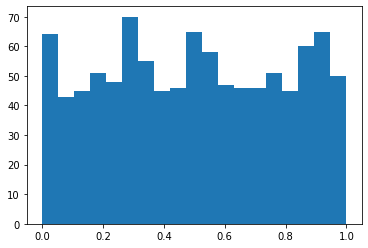

In [47]:
plt.figure()
_ = plt.hist(p_vls, bins=np.linspace(0, 1, 20))